# Making cutouts from a single or multiple bands

The first thing we will do is load the ID=718 z=14.63 JOF candidate from Robertson et al. 2023, as done in, for example, the [galaxy selection notebook](../selection/galaxy_selection.ipynb).

In [1]:
# imports
import astropy.units as u
import numpy as np
from copy import deepcopy
from galfind import Catalogue, Band_Cutout, Multiple_Band_Cutout
from galfind.Data import morgan_version_to_dir

Reading GALFIND config file from: /nvme/scratch/work/austind/GALFIND/galfind/../configs/galfind_config.ini


Failed to `import dust_attenuation`
Install from the repo with $ pip install git+https://github.com/karllark/dust_attenuation.git


In [2]:
survey = "JOF"
version = "v11"
instrument_names = ["NIRCam"]
aper_diams = [0.32] * u.arcsec
forced_phot_band = ["F277W", "F356W", "F444W"]
min_flux_pc_err = 10.

JOF_cat = Catalogue.pipeline(
    survey, 
    version, 
    instrument_names = instrument_names, 
    version_to_dir_dict = morgan_version_to_dir,
    aper_diams = aper_diams,
    forced_phot_band = forced_phot_band,
    min_flux_pc_err = min_flux_pc_err
)
# TODO: Smooth galaxy load-in
# from Robertson et al. 2023
z14_gal = JOF_cat[717]

INFO:galfind:Loaded aper_diams=<Quantity [0.32] arcsec> for F277W+F356W+F444W
INFO:galfind:Combined mask for NIRCam/F277W+F356W+F444W already exists at /raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/combined/JOF_F277W+F356W+F444W_auto.fits
Calculating depths:   0%|          | 0/15 [00:00<?, ?it/s]
INFO:galfind:Calculated/loaded depths for JOF v11 NIRCam
INFO:galfind:Local depth columns already exist in /raid/scratch/work/austind/GALFIND_WORK/Catalogues/v11/NIRCam/JOF/(0.32)as/JOF_MASTER_Sel-F277W+F356W+F444W_v11.fits
INFO:galfind:Loaded 'has_data_mask' from /raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/has_data_mask/JOF_MASTER_Sel-F277W+F356W+F444W_v11.h5
INFO:galfind:Making JOF v11 JOF_MASTER_Sel-F277W+F356W+F444W_v11 catalogue!
INFO:galfind:Made /raid/scratch/work/austind/GALFIND_WORK/Catalogues/v11/NIRCam/JOF/(0.32)as/JOF_MASTER_Sel-F277W+F356W+F444W_v11.fits catalogue!


## Example 1: Making (and plotting) a single band cutout

Now that we have loaded the galaxy in question, we will first produce and plot the F444W cutout for this source. There are various options regarding the size of the cutout to make, as well as various other plotting options (i.e. changing colourmaps, scaling, adding SNR labels, etc).

In [3]:
JOF_f444w_data = JOF_cat.data["F444W"]
z14_f444w_cutout = Band_Cutout.from_gal_band_data( \
    z14_gal, JOF_f444w_data, cutout_size = 0.96 * u.arcsec, overwrite = True)

print(z14_f444w_cutout)

Set OBSGEO-B to    29.758199 from OBSGEO-[XYZ].
Set OBSGEO-H to 1287432120.418 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to    29.758199 from OBSGEO-[XYZ].
Set OBSGEO-H to 1287432120.418 from OBSGEO-[XYZ]'.
INFO:galfind:Created cutout for SCI in F444W
INFO:galfind:Created cutout for SEG in F444W
INFO:galfind:Created cutout for RMS_ERR in F444W
INFO:galfind:Created cutout for WHT in F444W
INFO:galfind:Saved fits cutout to: /raid/scratch/work/austind/GALFIND_WORK/Cutouts/v11/JOF/0.96as/F444W/data/718.fits


****************************************
BAND_CUTOUT(718,F444W,0.96as):
****************************************
Cutout path: /raid/scratch/work/austind/GALFIND_WORK/Cutouts/v11/JOF/0.96as/F444W/data/718.fits
Meta:
----------
SIMPLE: True
BITPIX: 8
NAXIS: 0
EXTEND: True
ID: 718
SURVEY: JOF
VERSION: v11
RA: 53.10762649807784
DEC: -27.86013118667997
SIZE_AS: 0.96
SIZE_PIX: 32.0
****************************************



From the galfind logger information, we see that an 0.96as F444W cutout has been made and saved for this source, which contains SCI, SEG, WHT, and RMS_ERR extensions. WCS data is stored in the header of each of these extensions. We can load these explicitly by calling `Band_Cutout_Base.load()`, which `Band_Cutout` inherits.

In [4]:
z14_f444w_cutout_raw_data = z14_f444w_cutout.load(hdu_name = None)
z14_f444w_cutout_sci_data = z14_f444w_cutout.load(hdu_name = "SCI")

if z14_f444w_cutout_raw_data["SCI"][0] == z14_f444w_cutout_sci_data[0]:
    print("Header is the same!")
else:
    print("Header is different!")
try:
    np.testing.assert_array_equal(
        z14_f444w_cutout_raw_data["SCI"][1], 
        z14_f444w_cutout_sci_data[1]
    )
    print("Data is the same!")
except:
    print("Data is different!")

Header is the same!
Data is the same!


Now let's have a go at plotting the F444W cutout from this galaxy using the default plotting function (other than the default show = False, which has now been set to True for illustrative purposes).

INFO:galfind:Saved png cutout to: /raid/scratch/work/austind/GALFIND_WORK/Cutouts/v11/JOF/0.96as/F444W/png/718.png


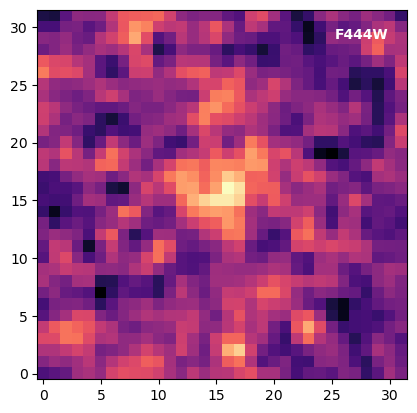

In [5]:
z14_f444w_cutout.plot(
    ax = None,
    plot_type = "SCI",
    imshow_kwargs = {"norm": "linear", "cmap": "magma"},
    norm_kwargs = {},
    plot_regions = [],
    scalebars = [],
    label_kwargs = {},
    show = True,
    save = True,
)

Now that we have seen what the default plotting code outputs, now let's have a look at how we can alter the default plotting kwargs to improve the plot appearance.

INFO:galfind:Saved png cutout to: /raid/scratch/work/austind/GALFIND_WORK/Cutouts/v11/JOF/0.96as/F444W/png/718.png


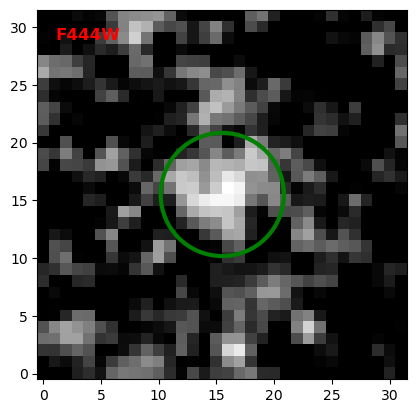

In [6]:
z14_f444w_cutout.plot(
    ax = None,
    plot_type = "SCI",
    imshow_kwargs = {"norm": "EPOCHS", "cmap": "Greys_r"},
    norm_kwargs = {"high_dyn_range": False, "SNR": None},
    plot_regions = [{"aper_diam": 0.32 * u.arcsec, "color": "green", "ls": "-", "lw": 3.}],
    scalebars = [],
    label_kwargs = {"xpos": 0.05, "ypos": 0.95, "ha": "left", "fontsize": "large", "c": "red"},
    show = True,
    save = True,
)

In the above cell we have plotted the extraction aperture for this source using the `aper_diam` dictionary key, although there also exists an option to supply the plot region explicitly here. Since `plot_radii` takes a list, any appropriate matplotlib.pyplot.patches.Ellipse object (of which patches.Circle is a child) inserted here will also be plotted. Let's try, for example, plotting the SExtractor fitting F444W Kron aperture for this source. It is worth noting that should the region be centred at (-99., -99.) that this will be by default set at the X/Y co-ordinates of the cutout/source centre.

INFO:galfind:Saved png cutout to: /raid/scratch/work/austind/GALFIND_WORK/Cutouts/v11/JOF/0.96as/F444W/png/718.png


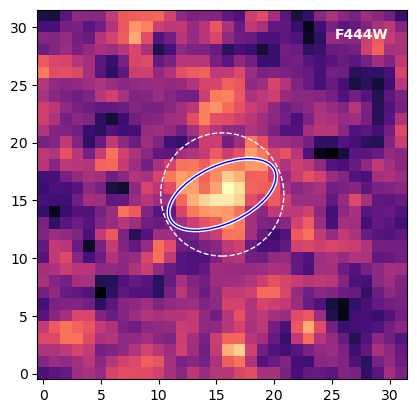

In [7]:
from matplotlib.patches import Ellipse
import matplotlib.patheffects as pe
# update catalogue with Kron apertures from the fits catalogue
# get updated galaxy from catalogue
# extract A_IMAGE, B_IMAGE, THETA_IMAGE from fits catalogue and produce elliptical Kron aperture
kron_kwargs = {"ls": "-", "color": "blue", "path_effects": [pe.withStroke(linewidth = 3., foreground = "white")]}
kron_aperture = Ellipse((-99., -99.), width = 10., height = 5., angle = 25., **kron_kwargs) #z14_gal.sex_A["F444W"], height = z14_gal.sex_B["F444W"], angle = z14_gal.sex_theta["F444W"])
# plot
z14_f444w_cutout.plot(plot_regions = [{"aper_diam": 0.32 * u.arcsec}, kron_aperture])

Woo! Now let's have a go at creating a `Band_Data` object using the other available class method, `from_band_data_skycoord()`. This method avoids the need to load in a `Galaxy` object at all. All that is required is a `Band_Data` object which stores the data to plot, an astropy SkyCoord object storing the RA/DEC sky position, and, as usual, a cutout size.

In [8]:
# code to run from_band_data_skycoord

## Example 2: Making and plotting multiple cutouts simultaneously

Fantastic! We have got the hang of plotting a single cutout. Fairly straightforwards right? Now we'll construct a `Multiple_Band_Cutout`, which stores an array of `Band_Cutout` objects for a single (or stacked) source. We will visit the stacking of galaxy cutouts in the [stacking notebook](stacking.ipynb), although for now we will use the `from_gal_data()` class method to instantiate our `Multiple_Band_Cutout` object directly from a single galaxy.

In [9]:
z14_cutouts = Multiple_Band_Cutout.from_gal_data(z14_gal, JOF_cat.data, cutout_size = 0.96 * u.arcsec, overwrite = True)

Set OBSGEO-B to    29.758199 from OBSGEO-[XYZ].
Set OBSGEO-H to 1287432120.418 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to    29.758199 from OBSGEO-[XYZ].
Set OBSGEO-H to 1287432120.418 from OBSGEO-[XYZ]'.
INFO:galfind:Created cutout for SCI in F090W
INFO:galfind:Created cutout for SEG in F090W


INFO:galfind:Created cutout for RMS_ERR in F090W
INFO:galfind:Created cutout for WHT in F090W
INFO:galfind:Saved fits cutout to: /raid/scratch/work/austind/GALFIND_WORK/Cutouts/v11/JOF/0.96as/F090W/data/718.fits
Set OBSGEO-B to    29.758199 from OBSGEO-[XYZ].
Set OBSGEO-H to 1287432120.418 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to    29.758199 from OBSGEO-[XYZ].
Set OBSGEO-H to 1287432120.418 from OBSGEO-[XYZ]'.
INFO:galfind:Created cutout for SCI in F115W
INFO:galfind:Created cutout for SEG in F115W
INFO:galfind:Created cutout for RMS_ERR in F115W
INFO:galfind:Created cutout for WHT in F115W
INFO:galfind:Saved fits cutout to: /raid/scratch/work/austind/GALFIND_WORK/Cutouts/v11/JOF/0.96as/F115W/data/718.fits
Set OBSGEO-B to    29.758199 from OBSGEO-[XYZ].
Set OBSGEO-H to 1287432120.418 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to    29.758199 from OBSGEO-[XYZ].
Set OBSGEO-H to 1287432120.418 from OBSGEO-[XYZ]'.
INFO:galfind:Created cutout for SCI in F150W
INFO:galf

The logging output usefully lets us know that we have created the cutouts appropriately. Let's see what data is shown when we print this object out.

In [10]:
print(z14_cutouts)

We now can see exactly what cutout data is stored, which can be especially useful when dealing with a large number of photometric bands. In some cases it may also be useful to be able to create this object simply by adding together many `Band_Data` objects. We overload the `Band_Data` and `Multiple_Band_Data` `__add__` and `__sub__` operators for exactly this purpose.

In [11]:
# code for __add__, __sub__, and __eq__ methods

We can see that our new `Multiple_Band_Cutout` object that we have constructed is identical to the one created using the class constructor method directly.

Let's now look at how we can plot the data stored in this object by calling the `plot()` function. This first appropriately sets up a figure and axes according to how many cutouts are stored, and then iteratively calls `Band_Cutout_Base.plot()` for each `Band_Cutout`/`Stacked_Band_Cutout` in `Multiple_Band_Cutout`.

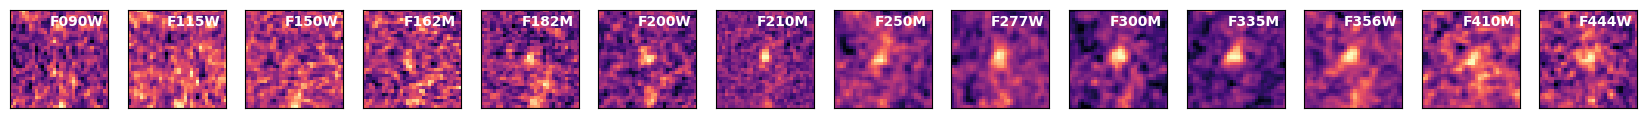

In [12]:
z14_cutouts.plot(
    n_rows = 1, 
    fig_scaling = 1.5,
    show = True, 
    save = True, 
    )

Yet again our first attempt at plotting has yielded the default (or most basic) implementation of the plotting code. Below we shall adjust some of these parameters and see how the output plot differs.

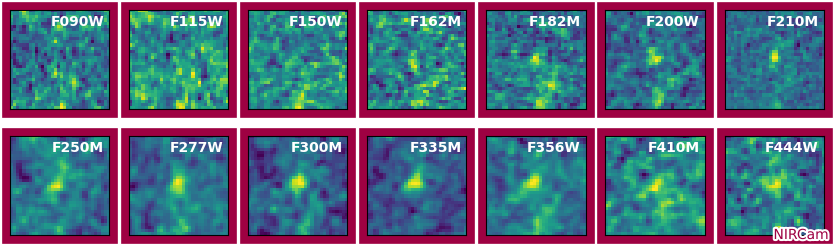

In [13]:
z14_cutouts.plot(
    n_rows = 2, 
    fig_scaling = 1.5, 
    imshow_kwargs = {"cmap": "viridis"}, 
    split_by_instr = True,
    show = True,
    save = True, 
    )

Let's say you also want to make a plot using a colormap that makes it *extremely* challenging for colorblind people to see, then you can do. Below we use `jet_r`.

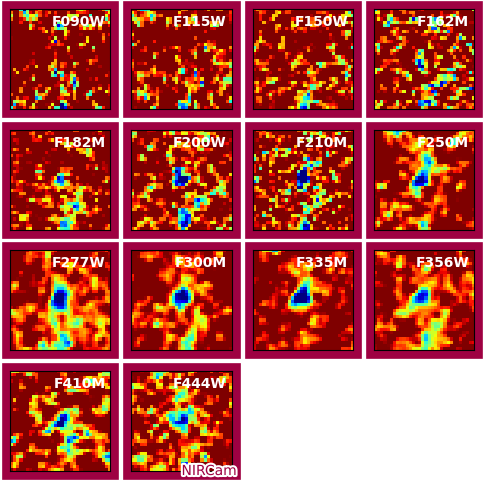

In [14]:
z14_cutouts.plot(
    n_rows = 4,
    fig_scaling = 1.5,
    split_by_instr = True,
    imshow_kwargs = {"cmap": "jet_r", "norm": "EPOCHS"},
    norm_kwargs = {"high_dyn_range": False, "SNR": None},
    show = True,
    save = True, 
    )